# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [2]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

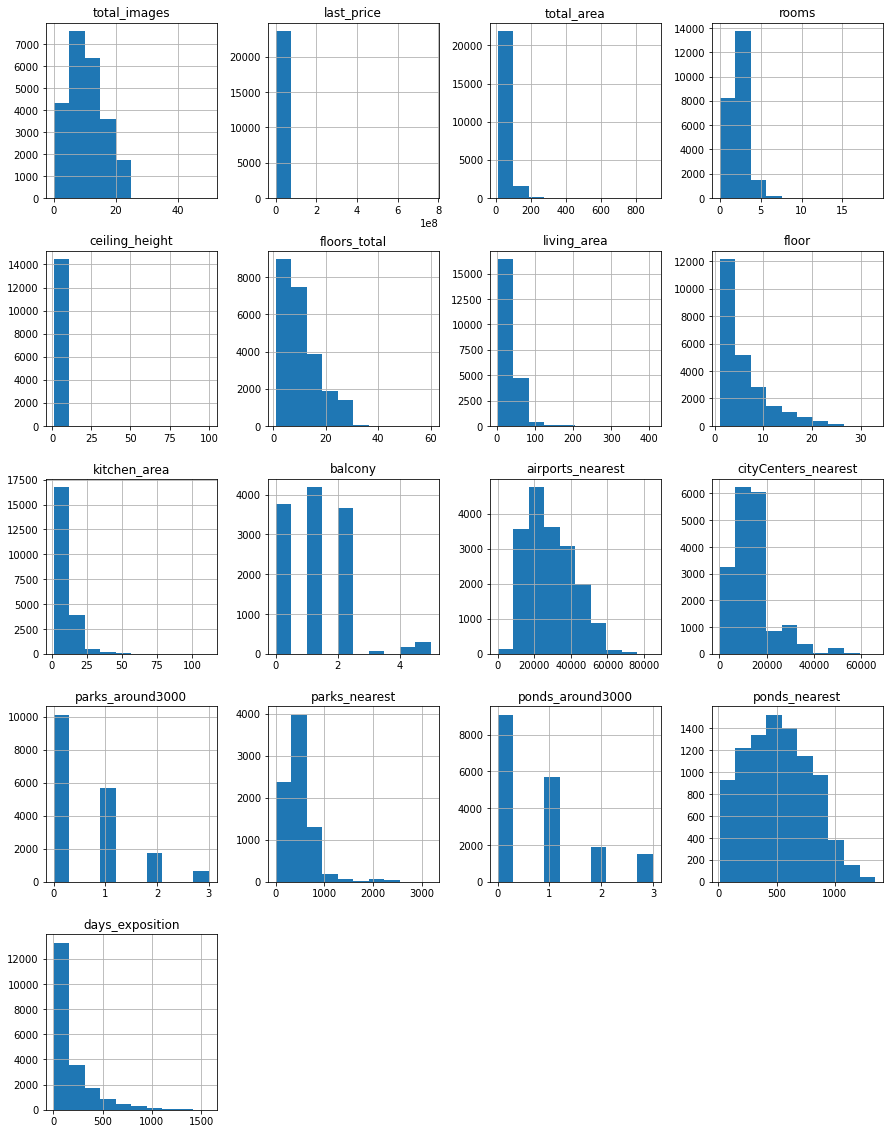

In [3]:
data.hist(figsize=(15, 20))

Открыли файл, изучили его методом info(). В таблице 23699 строк и большое количество пропусков в разных столбцах, встречаются анамальные значения и неявные дубликаты.

### Предобработка данных

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

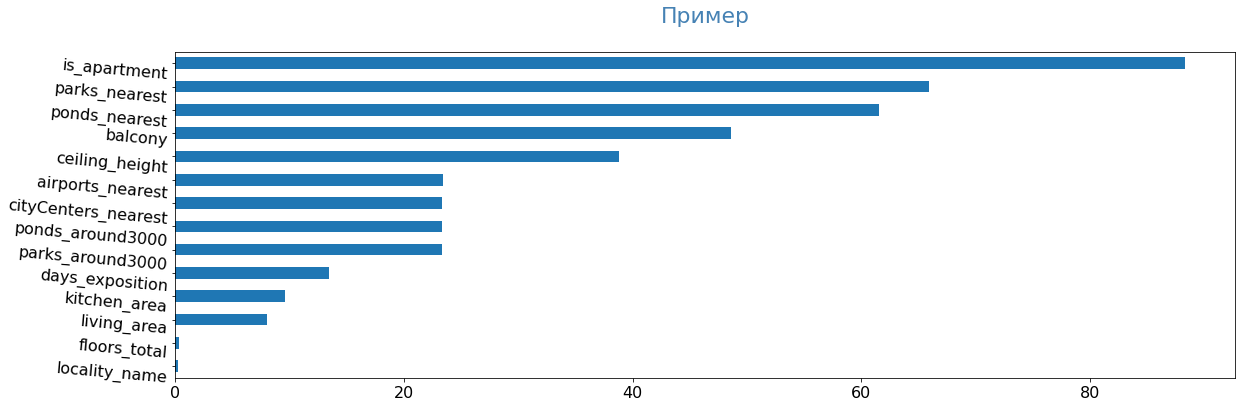

In [6]:
pass_value_barh(data)

In [7]:
data['balcony'] = data['balcony'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['is_apartment'] = data['is_apartment'].fillna(False)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [8]:
data['balcony'] = data['balcony'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data['last_price'] = data['last_price'].astype('int')

data['days_exposition'].fillna(10000, inplace=True)
data['days_exposition'] = data['days_exposition'].astype('int')

In [9]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%d %H:%M')

Заменили пропущенные значения на нули, поменяли тип вывода данных на целые числа, где возможно, а также поменяли формат времени и даты в столбце first_day_exposition.

In [10]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Чаще всего аномальные значения связанны с вводом вручную("человеческий фактор"). Вставим медиальное значение на место пропусков и уберем из данных значения выше 4 метров.

In [11]:
data['ceiling_height'] = (
    data['ceiling_height']
        .replace(32, 3.2)
        .replace(27.5, 2.75)
        .replace(26, 27.6)
        .replace(27, 2.7)
        .replace(24, 2.4)
)
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)
data = data[data['ceiling_height'] < 4]
data['ceiling_height'].unique()

array([2.7 , 2.65, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 ,
       2.55, 3.  , 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57, 3.5 ,
       3.3 , 2.71, 2.47, 2.73, 2.84, 3.1 , 2.34, 3.4 , 3.06, 2.72, 2.54,
       2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 2.87, 2.66, 2.59, 2.  , 2.45,
       3.6 , 2.92, 3.11, 3.13, 3.8 , 3.15, 3.55, 3.16, 3.62, 3.12, 2.53,
       2.74, 2.96, 2.46, 2.79, 2.95, 2.94, 3.82, 3.54, 3.53, 2.83, 2.4 ,
       3.38, 3.01, 3.65, 3.9 , 3.18, 3.35, 2.3 , 3.57, 2.48, 2.62, 2.82,
       3.98, 2.63, 3.83, 3.52, 3.95, 3.75, 2.88, 3.67, 3.87, 3.66, 3.85,
       3.86, 3.24, 3.36, 3.08, 3.68, 3.07, 3.37, 3.09, 3.26, 3.34, 2.81,
       3.44, 2.97, 3.14, 2.68, 3.22, 3.27, 2.93, 3.46, 3.47, 3.33, 3.63,
       3.32, 1.2 , 2.98, 2.86, 3.17, 3.28, 3.04, 3.84, 3.23, 3.02, 3.21,
       3.43, 3.78, 3.39, 2.69, 3.31, 3.56, 2.2 , 3.51, 3.93, 3.42, 2.99,
       3.49, 2.91, 3.88, 1.75, 3.29, 2.25, 3.76, 3.69, 2.89, 3.58, 2.49,
       3.48, 1.  , 3.59])

In [12]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [13]:
data['locality_name'] = (
    data['locality_name']
        .str.replace('ё','е')
        .replace('коттеджный поселок','поселок')
        .str.replace('поселок городского типа','поселок')
        .replace('деревня Кудрово','Кудрово')
        .replace('поселок Мга','городской поселок Мга')
)

Дубликаты поменяли в наименованиях локации квартиры. Тоже появились в связи с вводом похожих названий оператором.

In [16]:
data.dropna(subset=['locality_name'], inplace=True)
data.dropna(subset=['floors_total'], inplace=True)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1857
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2209
balcony                     0
locality_name               0
airports_nearest         5509
cityCenters_nearest      5489
parks_around3000            0
parks_nearest           15495
ponds_around3000            0
ponds_nearest           14490
days_exposition             0
dtype: int64

Убрали малочисленные строчки с пропусками из расчетов.

In [17]:
living_r = data['living_area'].mean() / data['total_area'].mean()
kitchen_r = data['kitchen_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living_r * data['total_area'], inplace=True)
data['kitchen_area'].fillna(kitchen_r * data['total_area'], inplace=True)
data['living_area'] = round(data['living_area'],1)
data['kitchen_area'] = round(data['kitchen_area'],1)
check = data.query('total_area*0.9 <= (living_area + kitchen_area)')
check.info()

data = data.drop(data.query('total_area*0.9 <= (living_area + kitchen_area)').index)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 41 to 23680
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          651 non-null    int64         
 1   last_price            651 non-null    int64         
 2   total_area            651 non-null    float64       
 3   first_day_exposition  651 non-null    datetime64[ns]
 4   rooms                 651 non-null    int64         
 5   ceiling_height        651 non-null    float64       
 6   floors_total          651 non-null    float64       
 7   living_area           651 non-null    float64       
 8   floor                 651 non-null    int64         
 9   is_apartment          651 non-null    bool          
 10  studio                651 non-null    bool          
 11  open_plan             651 non-null    bool          
 12  kitchen_area          651 non-null    float64       
 13  balcony          

Аномальных знчений получилось 649 строк из более чем 23тыс.значений, их мы удалили из расчетов, так как они изначально противоречат данным.

In [18]:
gaps_airports_nearest = data.sort_values('locality_name', ascending=False)
gaps_airports_nearest

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
15459,8,2000000,59.0,2018-11-18,3,2.65,2.0,42.3,2,False,...,6.5,1,село Шум,NaN,NaN,0,NaN,0,NaN,9
19176,8,1100000,30.0,2017-04-17,1,2.65,2.0,15.8,1,False,...,6.0,0,село Старая Ладога,NaN,NaN,0,NaN,0,NaN,10000
4672,0,1800000,55.0,2018-02-18,2,2.65,3.0,31.4,1,False,...,9.6,0,село Старая Ладога,NaN,NaN,0,NaN,0,NaN,45
4483,12,2300000,46.5,2017-10-20,1,2.55,10.0,20.1,8,False,...,14.3,0,село Русско-Высоцкое,NaN,NaN,0,NaN,0,NaN,414
18739,9,2250000,42.0,2017-12-03,2,2.65,5.0,24.0,4,False,...,7.4,0,село Русско-Высоцкое,NaN,NaN,0,NaN,0,NaN,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1761,11,999000,62.0,2018-02-15,4,2.65,5.0,46.0,2,False,...,7.0,0,Бокситогорск,NaN,NaN,0,NaN,0,NaN,226
8779,9,620000,36.0,2018-01-15,1,2.65,5.0,19.0,5,False,...,8.0,0,Бокситогорск,NaN,NaN,0,NaN,0,NaN,45
17075,7,660000,43.0,2018-10-23,2,2.65,3.0,29.0,3,False,...,6.0,0,Бокситогорск,NaN,NaN,0,NaN,0,NaN,20
3731,10,1310000,65.6,2019-02-22,3,2.65,5.0,42.0,4,False,...,7.5,0,Бокситогорск,NaN,NaN,0,NaN,0,NaN,10000


In [19]:
locality_name_analysis = data[['locality_name', 'airports_nearest','parks_nearest','ponds_nearest','cityCenters_nearest']]
locality_name_analysis.sort_values('locality_name')
locality_name_analysis.pivot_table(index='locality_name',values=['locality_name','airports_nearest','parks_nearest','ponds_nearest','cityCenters_nearest'])


,airports_nearest,cityCenters_nearest,parks_nearest,ponds_nearest
locality_name,,,,
Зеленогорск,73300.250000,54617.583333,210.625000,485.888889
Колпино,26381.741742,32119.066066,496.636364,530.227513
Красное Село,26635.029240,30059.748538,473.386364,445.500000
Кронштадт,67432.978261,49159.456522,325.750000,351.226190
Ломоносов,48314.138462,50730.546154,389.062500,546.768293
Павловск,21053.342105,33206.921053,379.538462,493.382353
Петергоф,40196.904040,35440.994949,411.815603,515.460870
Пушкин,16475.169444,28776.359331,403.655502,475.000000
Санкт-Петербург,28102.407132,11660.647215,499.664611,521.375262


Большая часть пропущенных значений относится к поселкам, которые не составляют основную массу продаваемых квартир. На выполнения анализа по проектной части не влияет, можно оставить не меняя кроме cityCenters_nearest. 

In [20]:
analysis_cityCenters = locality_name_analysis.groupby('locality_name')['cityCenters_nearest'].count()
analysis_cityCenters.sort_values().head(30)

locality_name
Бокситогорск              0
поселок Кузнечное         0
поселок Красный Бор       0
поселок Красносельское    0
поселок Красная Долина    0
поселок Котельский        0
поселок Коробицыно        0
поселок Кондратьево       0
поселок Коммунары         0
поселок Кобринское        0
поселок Кобралово         0
поселок Кирпичное         0
поселок Кингисеппский     0
поселок Кикерино          0
поселок Каложицы          0
поселок Калитино          0
поселок Кузьмоловский     0
поселок Ильичево          0
поселок Лебяжье           0
поселок Лесное            0
поселок Павлово           0
поселок Оредеж            0
поселок Новый Учхоз       0
поселок Новый Свет        0
поселок Новогорелово      0
поселок Никольский        0
поселок Назия             0
поселок Мыза-Ивановка     0
поселок Мурино            0
поселок Молодцово         0
Name: cityCenters_nearest, dtype: int64

In [21]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22813 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22813 non-null  int64         
 1   last_price            22813 non-null  int64         
 2   total_area            22813 non-null  float64       
 3   first_day_exposition  22813 non-null  datetime64[ns]
 4   rooms                 22813 non-null  int64         
 5   ceiling_height        22813 non-null  float64       
 6   floors_total          22813 non-null  float64       
 7   living_area           22813 non-null  float64       
 8   floor                 22813 non-null  int64         
 9   is_apartment          22813 non-null  bool          
 10  studio                22813 non-null  bool          
 11  open_plan             22813 non-null  bool          
 12  kitchen_area          22813 non-null  float64       
 13  balcony         

In [22]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5319
cityCenters_nearest      5299
parks_around3000            0
parks_nearest           15070
ponds_around3000            0
ponds_nearest           14091
days_exposition             0
dtype: int64

Был проведен анализ таблицы, на основе которого выявлено большое количество пропусков. Оставлены были пропуски, которые не влият на расчеты таблицы. Проанализировав в каких типах локации больше всего встречается пропусков, выяснили, что это поселки, деревни, села, которые не так явно влияют на статистические данные как города.По возможности пропуски заменили медиальными значениями.Можно преступать к дальнейшей подготовке данных.

### Посчитайте и добавьте в таблицу новые столбцы

In [23]:
data['price_per_squaremeter'] = data['last_price'] / data['total_area']
data['price_per_squaremeter'] = data['price_per_squaremeter'].astype('int')
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

In [24]:
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_group, axis=1)

In [25]:
data['cityCenters_nearest_in_km'] = data['cityCenters_nearest']/1000
data['cityCenters_nearest_in_km'] = data['cityCenters_nearest_in_km'].round()

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_squaremeter,weekday,month,year,floor_type,cityCenters_nearest_in_km
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2,755.0,10000,120370,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,NaN,0,NaN,81,82920,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,90.0,2,574.0,558,92785,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,90.8,9,False,...,84.0,3,234.0,424,408176,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1,48.0,121,100000,1,6,2018,другой,8.0


Добавили требующиеся новые параметры в существующую таблицу.

### Проведите исследовательский анализ данных

<AxesSubplot:>

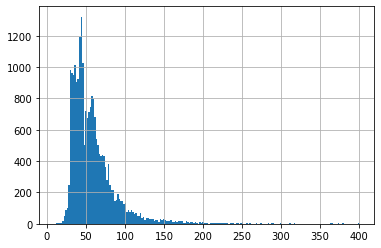

In [26]:
data['total_area'].hist(bins=200, range=(10,400))

<AxesSubplot:>

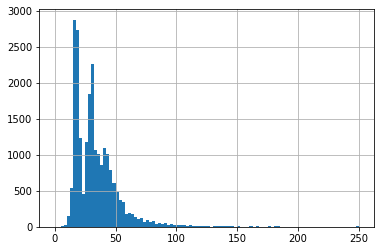

In [27]:
data['living_area'].hist(bins=100,range=(0,250))

<AxesSubplot:>

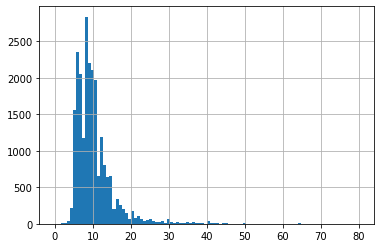

In [28]:
data['kitchen_area'].hist(bins=100,range=(0,80))

<AxesSubplot:ylabel='Frequency'>

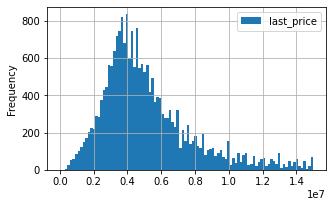

In [29]:
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,15000000), figsize = (5,3))

Text(0.5, 1.0, 'Кол-во комнат')

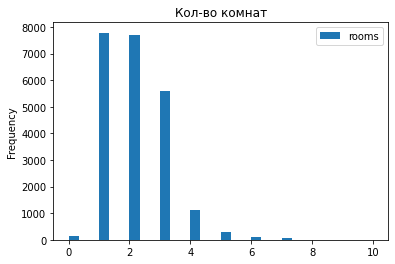

In [30]:
data.plot(y = 'rooms', kind = 'hist', bins = 30, range = (0,10))
plt.title('Кол-во комнат')

Text(0.5, 1.0, 'Высота потолков')

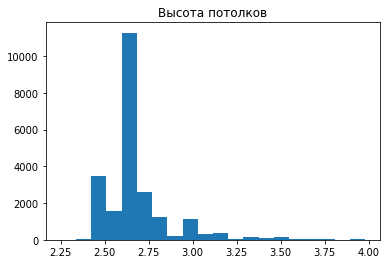

In [31]:
plt.hist(data.query('(ceiling_height > 2) & (ceiling_height < 4)')['ceiling_height'], bins=20)
plt.title('Высота потолков')

<AxesSubplot:>

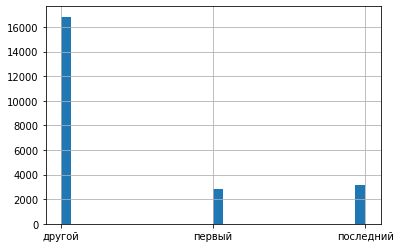

In [32]:
data['floor_type'].hist(bins=30)

<AxesSubplot:>

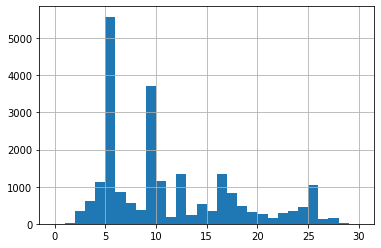

In [33]:
data['floors_total'].hist(bins=30, range=(0,30))

<AxesSubplot:>

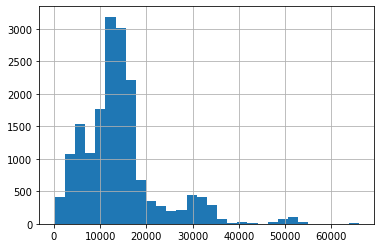

In [35]:
data['cityCenters_nearest'].hist(bins=30)

<AxesSubplot:>

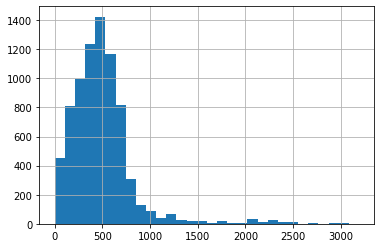

In [36]:
data['parks_nearest'].hist(bins=30)

Выводы:
Площадь: основная масса квартир до 100кв.м. Большинство приходится на квартиры от 40 до 70кв.м.
Жилая площадь: основная масса до 50кв.м. Большинство приходится на квартиры с жилой площадь от 10 до 30кв.м.
Площадь кухни: большая часть квартир с площадь кухни от 5 до 15кв.м, редко встречаются после 15кв.м.
Цена объекта: основная стоимость квартир приходится до 6млн, затем количество квартир с высшей стоимостью идет на спад.
Количество комнат:основная масса 1,2,3 комных, гораздо реже 4-х комнатных.
Высота потолков: основное значение около 2,65м.
Тип этажа квартиры: квартиры в большей степени находятся не на последних и не первых этажах.
Общее количество этажей: дома в основном в 5 и 9 этажей.
Расстояние до центра:до 20км
Расстояние до парка:до 1000м.

In [38]:
data['floors_total'] = data['floors_total'].astype('int')

In [41]:
data = data.query('(rooms<8)&(rooms>0)&(total_area<300)&(ceiling_height>2)&(days_exposition<1000)&(last_price>500000)&(living_area>5)&(living_area<300)&(floors_total<35)')
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"19,268.00","19,268.00","19,268.00","19,268.00","19,268.00","19,268.00","19,268.00","19,268.00","19,268.00"
min,1.00,13.00,2.25,1.00,"520,000.00",5.40,2.00,1.00,1.00
max,7.00,297.50,3.98,999.00,"330,000,000.00",211.00,107.00,32.00,34.00


Text(0.5, 1.0, 'Скорость продажи квартир')

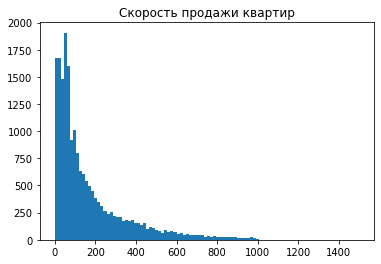

In [49]:
plt.hist(data.query('days_exposition != 10000')['days_exposition'], bins=100, range=(0,1500))
plt.title('Скорость продажи квартир')

In [51]:
data['days_exposition'].describe()

count    19268.000000
mean       167.185022
std        186.997341
min          1.000000
25%         44.000000
50%         93.000000
75%        221.000000
max        999.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

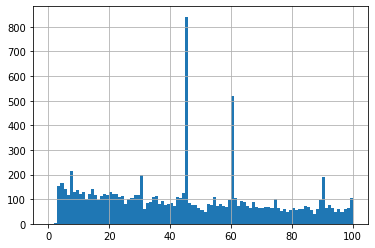

In [52]:
data['days_exposition'].hist(bins=100, range=(0,100))

In [53]:
good_data = data.query('days_exposition != 0 and days_exposition != 7 and days_exposition != 30 and days_exposition != 45 and days_exposition !=60 and days_exposition != 90 and days_exposition != 10000')

count    17302.000000
mean       180.758005
std        192.580377
min          1.000000
25%         44.000000
50%        112.000000
75%        246.000000
max        999.000000
Name: days_exposition, dtype: float64

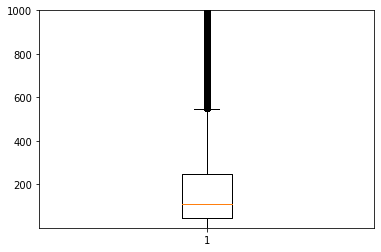

In [54]:
import matplotlib.pyplot as plt
plt.boxplot(good_data['days_exposition'])
plt.ylim(1,1000)
good_data['days_exposition'].describe()

Изучили как быстро продаются квартиры, большая часть продается до 200 дней, если убрать выбросы, то среднее - 195, а медиана - 113.

0.6663938948225172


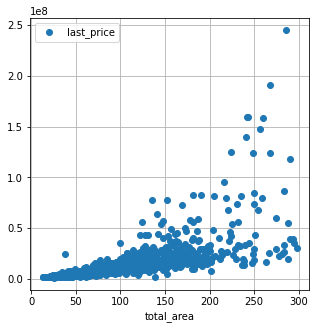

In [55]:
(
    data.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
print(data['total_area'].corr(data['last_price']))

0.58299599324349


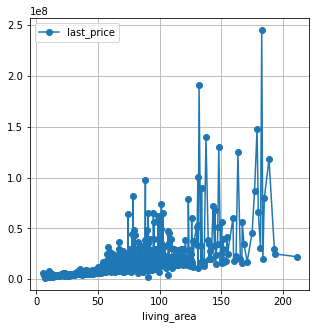

In [56]:
(
    data.query('living_area > 0').pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
print(data['living_area'].corr(data['last_price']))

0.5255509766670329


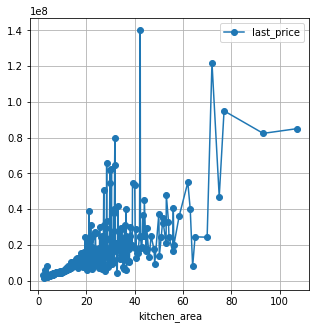

In [57]:
(
    data.query('kitchen_area > 0').pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
print(data['kitchen_area'].corr(data['last_price']))

<AxesSubplot:xlabel='rooms'>

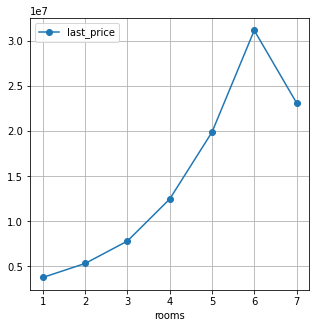

In [58]:
(
    data.query('rooms > 0').pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)

<AxesSubplot:xlabel='floor_type'>

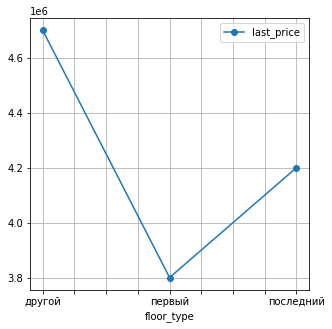

In [59]:
(
    data.pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)

Чем больше площадь квартиры,жилое пространство и больше площадь кухни, тем больше стоимость квртиры.
Квартиры на первом этаже резко дешевле по отношению к другим этажам. 

<AxesSubplot:xlabel='month'>

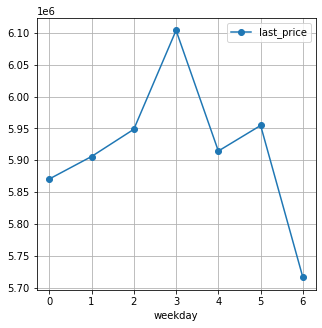

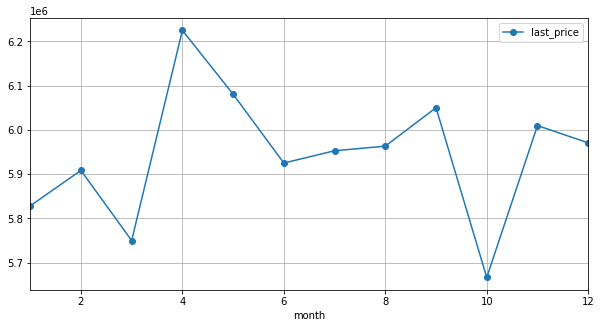

In [60]:
(
    data.pivot_table(index='weekday', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)

(
    data.pivot_table(index='month', values='last_price')
    .plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
)

<AxesSubplot:xlabel='year'>

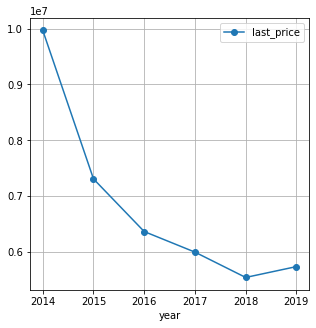

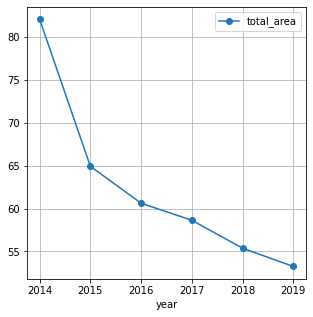

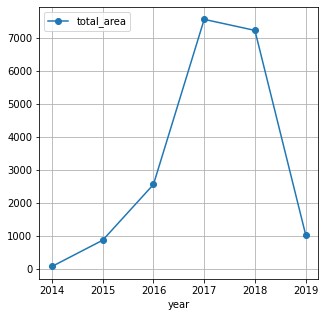

In [61]:
(
    data.pivot_table(index='year', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)

(
    data.pivot_table(index='year', values='total_area')
    .plot(grid=True, style='o-', figsize=(5, 5))
)

(
    data.pivot_table(index='year', values='total_area',aggfunc = 'count')
    .plot(grid=True, style='o-', figsize=(5, 5))
)

    В субботу квартиры дороже, самые дешевые в воскресенье. Самые дорогие квартиры в сентябре и декабре, самые дешевые в ноябре. Самая низкая стоимость была в 2018 году, самая высокая - в 2014. Количество продаж в 2017 и 2018 гораздо больше, чем в остальные года.  Общая площадь квартир с 2014 года начала уменьшаться и к 2014 году опустилась до 60кв.м. против почти 90кв.м. в 2014 году.

In [62]:
locality_pivot_table = data.pivot_table(index = 'locality_name', values = 'price_per_squaremeter', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)
locality_pivot_table['mean'] = locality_pivot_table['mean'].astype(int)

locality_pivot_table

,count,mean
locality_name,,
Санкт-Петербург,12812,110922
поселок Мурино,494,84829
Кудрово,400,93900
поселок Шушары,395,77452
Всеволожск,314,68301
Колпино,301,74744
поселок Парголово,295,89467
Пушкин,291,101530
Гатчина,260,67856


<AxesSubplot:ylabel='locality_name'>

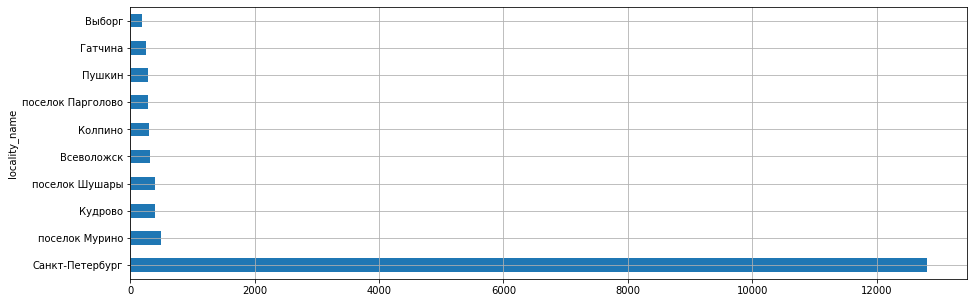

In [63]:
locality_pivot_table['count'].plot(kind = 'barh',grid=True, figsize=(15, 5))

Самые дорогие квартиры в Санкт-Петербурге, самые дешевые - в Выборге.

In [64]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'price_per_squaremeter', 'weekday',
       'month', 'year', 'floor_type', 'cityCenters_nearest_in_km'],
      dtype='object')

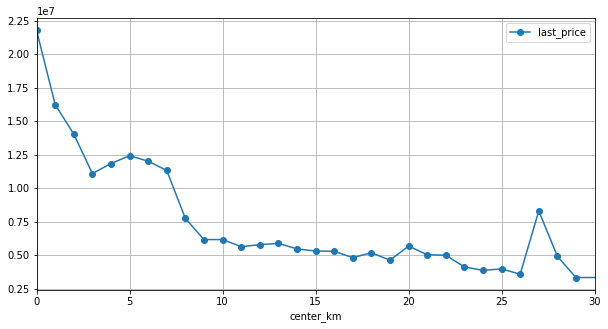

<AxesSubplot:xlabel='total_area'>

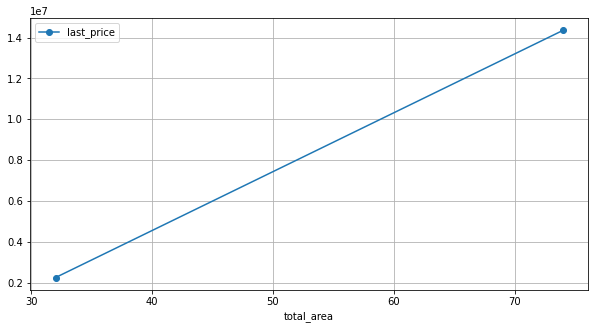

In [65]:
data['center_km'] = data['cityCenters_nearest'] / 1000
data['center_km'] = data['center_km'].fillna(value=99999).astype(int)
(
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='center_km', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,30), figsize=(10, 5))
)
plt.show()

(
    data.query('(locality_name == "Санкт-Петербург") & (center_km ==27)')
    .pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o-', figsize=(10, 5))
)

In [66]:
data.query('(locality_name == "Санкт-Петербург") & (center_km ==27)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_squaremeter,weekday,month,year,floor_type,cityCenters_nearest_in_km,center_km
748,13,14350000,74.0,2017-11-28,2,3.13,5,30.0,3,False,...,0,NaN,128,193918,1,11,2017,другой,27.0,27
5961,6,2250000,32.0,2018-02-27,1,2.65,2,16.5,2,False,...,0,NaN,178,70312,1,2,2018,последний,27.0,27


In [67]:
spb_3km = data.query('(locality_name == "Санкт-Петербург") & (center_km ==3)')
print(spb_3km)
spb_5km = data.query('(locality_name == "Санкт-Петербург") & (center_km ==5)')
print(spb_5km)


       total_images  last_price  total_area first_day_exposition  rooms  \
35                6    15500000       149.0           2017-06-26      5   
136              16     6500000        51.8           2018-08-01      2   
201               5    10880000       123.1           2015-11-12      6   
315               8    13900000       108.0           2018-09-29      4   
316              11     5650000        46.3           2017-03-13      2   
...             ...         ...         ...                  ...    ...   
23244            15     3750000        37.9           2018-11-07      1   
23338            17     6350000        73.9           2018-08-14      3   
23427            10     7600000       104.0           2017-11-28      5   
23430            18     5260000        38.0           2018-11-06      1   
23449             4     6300000        52.6           2015-05-28      3   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
35               2.65

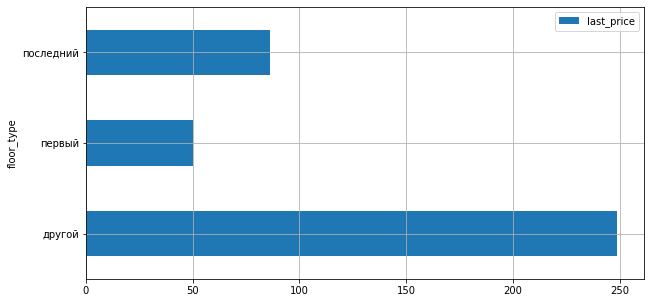

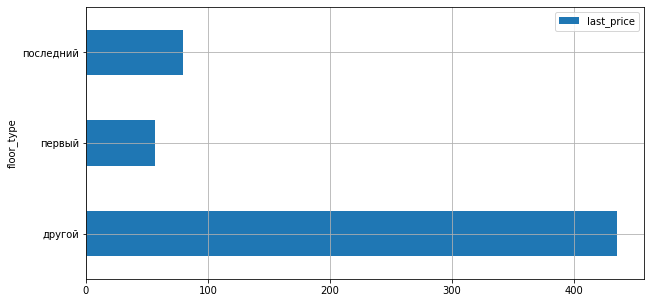

In [68]:
(
    data.query('(locality_name == "Санкт-Петербург") & (center_km ==3)')
    .pivot_table(index='floor_type', values='last_price', aggfunc = 'count')
    .plot(grid=True, kind='barh', figsize=(10, 5))
)
plt.show()
(
    data.query('(locality_name == "Санкт-Петербург") & (center_km ==5)')
    .pivot_table(index='floor_type', values='last_price',aggfunc='count')
    .plot(grid=True, kind='barh', figsize=(10, 5))
)
plt.show()

Исходя из гистограмы видно,что чем удаленность дальше от центра, тем стоимость квартир уменьшается.Проанализировав выбросы на 3 и 5 км, пришли к выводу, что такой скачок произошел за счет аномальных увнеличений площади квартир от 200 до 600 кв.м.
Выброс на 27 км произошел из_за увеличения стоимости квартиры выше средней в данном районе.

### Общий вывод

Мы провели исследовательский анализ данных, чтобы установить параметры, влияющие на цену объектов. Анализ  позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. Для этого был изучен файл с данными, обработан на аномалии и дубликаты, посчитаны и добавлены новые необходимые данные в таблицу и в дальнейшем проведен исследовательский анализ.

После изучения таблицвы были выявлено большое количество пропусков. Оставлены были пропуски, которые не влият на расчеты таблицы. Проанализировав в каких типах локации больше всего встречается пропусков, выяснили, что это поселки, деревни, села, которые не так явно влияют на статистические данные как города.По возможности пропуски заменили медиальными значениями.Также были заменены дубликаты в наименованиях поселков, сел и городов, также заменила ошибки заполнения в высоте потолков, например, 32 на 3.2.

Стоимость квартир увеличивается за счет увеличения метража и удаленности от центра. В центре города практически нет разницы, насколько квартира удалена. Центр - это до 8км, судя по графикам. На квартиры в центре те же факторы, что и на остальные квартиры не влиют.

На стоимость также влияет этаж( стоимость выше у не первого и не проследнего).
Средний срок продажи квартиры 95 дней,сли меньше 45 дней, то это быстро, если дольше 200 дней - это долго.
Есть большое число квартир, проданных всего за несколько дней после публикации, также есть квартиры, которые продавались больше года.
На стоимость больше влияет площадь квартиры, нежели число комнат. Т.е. могут быть дорогие квартиры с малым числом комнат, но где комнаты просторные.
Дороже всего стоимость квадратного метра в Санкт-Петербурге(110922/кв.м.), ниже в Выборге(57422/кв.м.).